In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.stats import linregress
import numpy as np
from scipy import stats
import seaborn as sns

In [43]:
file = r'C:\Users\Ana Torres\Documents\UofT\Challenges\Project\United_States_COVID-19.csv'
data_df = pd.read_csv(file, infer_datetime_format=True, parse_dates=True)
data_df.dtypes

submission_date     object
state               object
tot_cases            int64
conf_cases         float64
prob_cases         float64
new_case             int64
pnew_case          float64
tot_death            int64
conf_death         float64
prob_death         float64
new_death            int64
pnew_death         float64
created_at          object
consent_cases       object
consent_deaths      object
dtype: object

In [44]:
data_df["submission_date"]=pd.to_datetime(data_df["submission_date"])


In [45]:
# Create a DataFrame with csv file
data_df.set_index("submission_date", inplace=True)
data_df.sort_index(inplace=True)
data_df.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
submission_date,,,,,,,,,,,,,,
2020-01-22,WA,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/22/2020 12:00:00 AM,NaN,NaN
2020-01-22,WI,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-22,WV,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Not agree
2020-01-22,UT,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2020-01-22,GA,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [72]:
california = data_df.loc[(data_df["state"] == "CA")]
california.sort_index()
california.head()

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,region
submission_date,,,,,,,,,,,,,,,
2020-01-22,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/24/2020 12:00:00 AM,Agree,Not agree,West
2020-01-23,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/25/2020 12:00:00 AM,Agree,Not agree,West
2020-01-24,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/26/2020 12:00:00 AM,Agree,Not agree,West
2020-01-25,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/27/2020 12:00:00 AM,Agree,Not agree,West
2020-01-26,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/28/2020 12:00:00 AM,Agree,Not agree,West


In [73]:
california.isna().sum()

state               0
tot_cases           0
conf_cases          0
prob_cases          0
new_case            0
pnew_case           0
tot_death           0
conf_death        367
prob_death        367
new_death           0
pnew_death          0
created_at          0
consent_cases       0
consent_deaths      0
region              0
dtype: int64

In [75]:
len(california['conf_cases'])

1001

In [76]:
california.head(50)

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,region
submission_date,,,,,,,,,,,,,,,
2020-01-22,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/24/2020 12:00:00 AM,Agree,Not agree,West
2020-01-23,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/25/2020 12:00:00 AM,Agree,Not agree,West
2020-01-24,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/26/2020 12:00:00 AM,Agree,Not agree,West
2020-01-25,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/27/2020 12:00:00 AM,Agree,Not agree,West
2020-01-26,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/28/2020 12:00:00 AM,Agree,Not agree,West
2020-01-27,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/29/2020 12:00:00 AM,Agree,Not agree,West
2020-01-28,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/30/2020 12:00:00 AM,Agree,Not agree,West
2020-01-29,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,01/31/2020 12:00:00 AM,Agree,Not agree,West
2020-01-30,CA,0,0.0,0.0,0,0.0,0,NaN,NaN,0,0.0,02/01/2020 12:00:00 AM,Agree,Not agree,West


In [77]:
california.tail(50)

,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,region
submission_date,,,,,,,,,,,,,,,
2022-08-30,CA,11075694,10268137.0,807557.0,30245,0.0,94120,NaN,NaN,73,0.0,08/31/2022 01:15:09 PM,Agree,Not agree,West
2022-08-31,CA,11075694,10268137.0,807557.0,0,0.0,94120,NaN,NaN,0,0.0,09/01/2022 01:15:58 PM,Agree,Not agree,West
2022-09-01,CA,11075694,10268137.0,807557.0,0,0.0,94120,NaN,NaN,0,0.0,09/02/2022 01:12:43 PM,Agree,Not agree,West
2022-09-02,CA,11109226,10291286.0,817940.0,33532,10383.0,94239,NaN,NaN,119,0.0,09/03/2022 01:13:39 PM,Agree,Not agree,West
2022-09-03,CA,11109226,10291286.0,817940.0,0,0.0,94239,NaN,NaN,0,0.0,09/04/2022 01:18:24 PM,Agree,Not agree,West
2022-09-04,CA,11109226,10291286.0,817940.0,0,0.0,94239,NaN,NaN,0,0.0,09/05/2022 01:29:13 PM,Agree,Not agree,West
2022-09-05,CA,11109226,10291286.0,817940.0,0,0.0,94239,NaN,NaN,0,0.0,09/06/2022 01:13:33 PM,Agree,Not agree,West
2022-09-06,CA,11137381,10314717.0,822664.0,28155,4724.0,94351,NaN,NaN,112,0.0,09/07/2022 01:19:56 PM,Agree,Not agree,West
2022-09-07,CA,11137381,10314717.0,822664.0,0,0.0,94351,NaN,NaN,0,0.0,09/08/2022 01:14:06 PM,Agree,Not agree,West


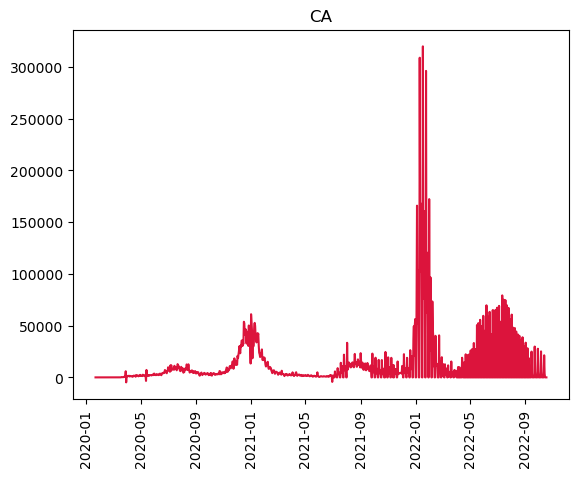

In [101]:
plt.plot(california.index.values, california['new_case'], color='crimson')
plt.xticks(rotation=90)
plt.title(state)
plt.savefig(f"{state}.png")
plt.show()

In [54]:
states_list = data_df['state'].unique()
states_list

array(['WA', 'WI', 'WV', 'UT', 'GA', 'OH', 'MA', 'HI', 'WY', 'DE', 'DC',
       'KS', 'RMI', 'AS', 'PW', 'MD', 'CO', 'MS', 'OK', 'NE', 'IL', 'KY',
       'SD', 'AK', 'LA', 'GU', 'FL', 'FSM', 'MN', 'TN', 'MO', 'AL', 'MP',
       'IA', 'ME', 'PR', 'ND', 'PA', 'NJ', 'RI', 'AZ', 'VA', 'NC', 'NH',
       'NYC', 'CT', 'SC', 'IN', 'NY', 'VI', 'TX', 'MI', 'NV', 'AR', 'MT',
       'NM', 'VT', 'ID', 'OR', 'CA'], dtype=object)

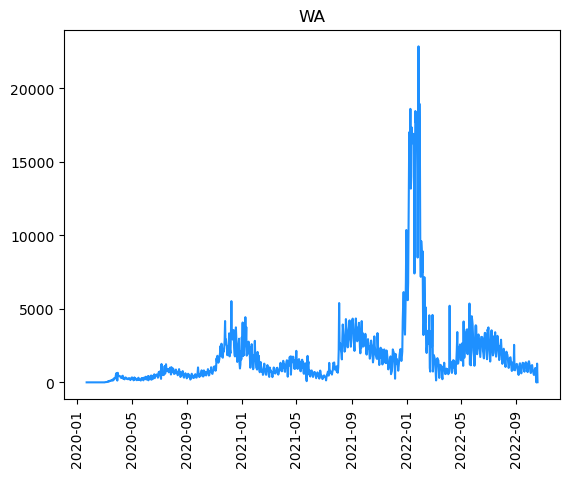

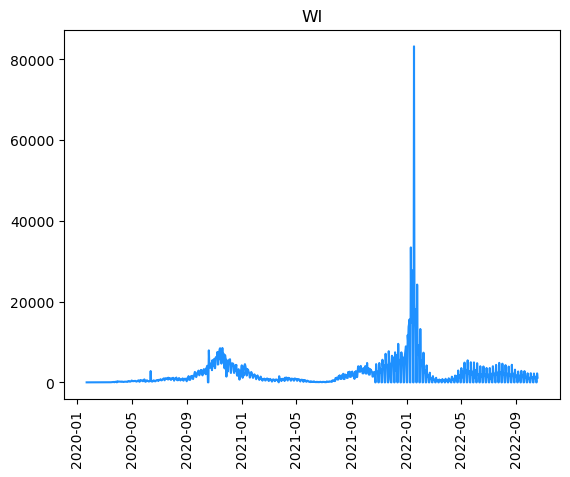

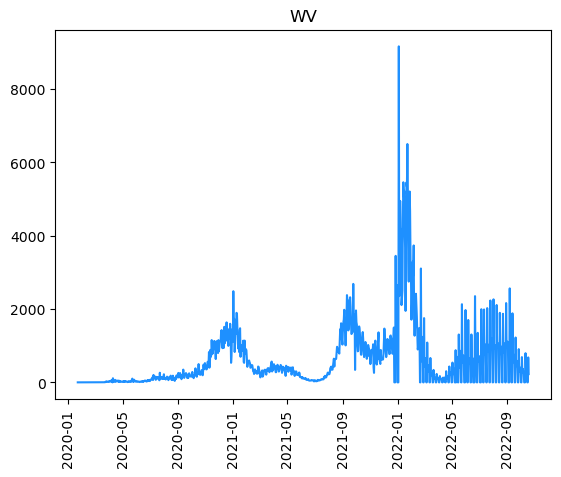

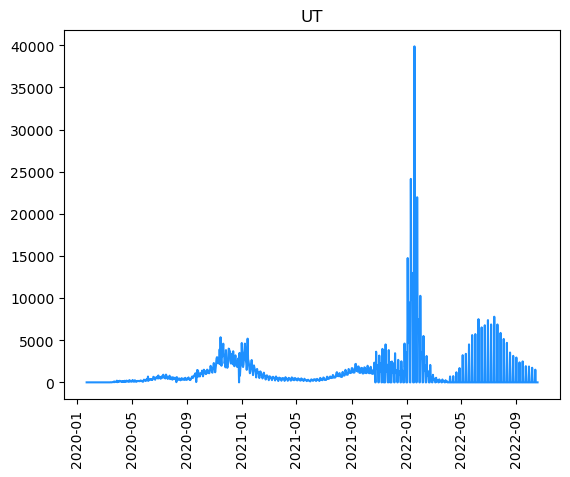

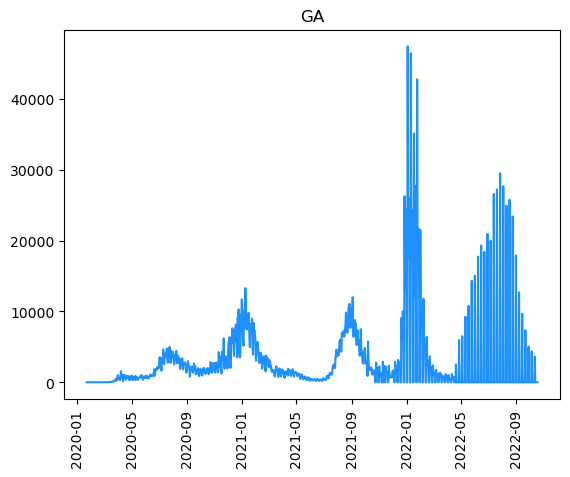

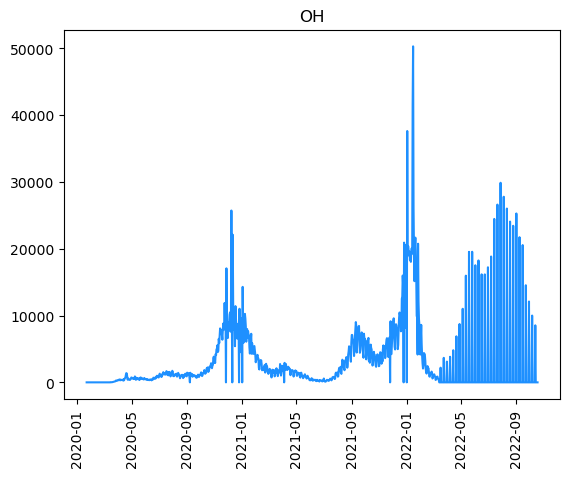

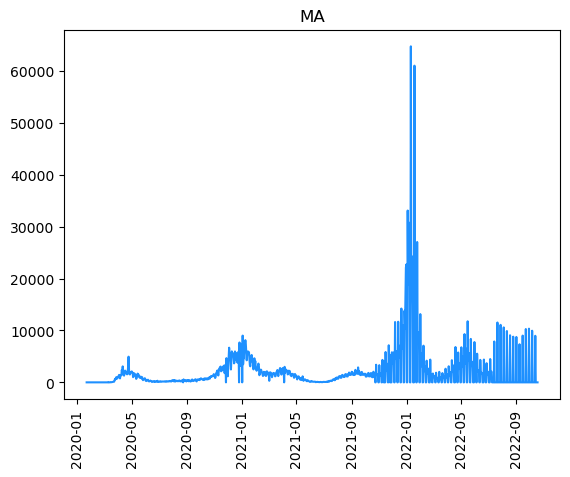

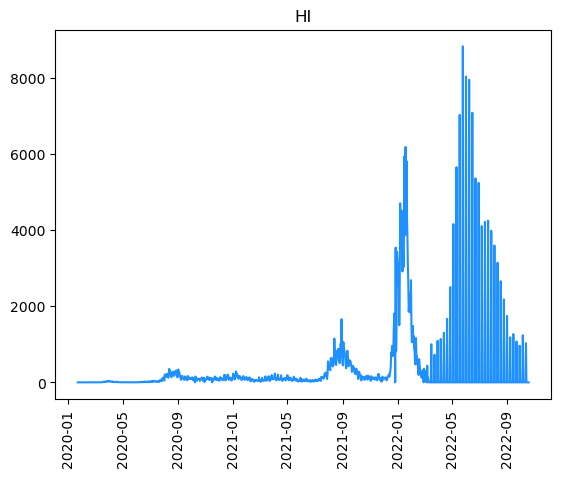

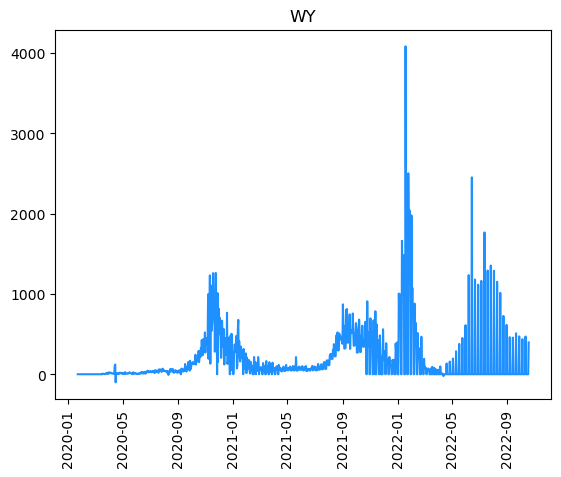

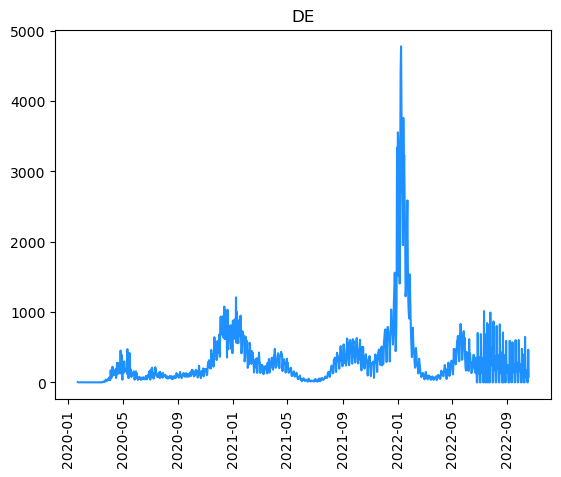

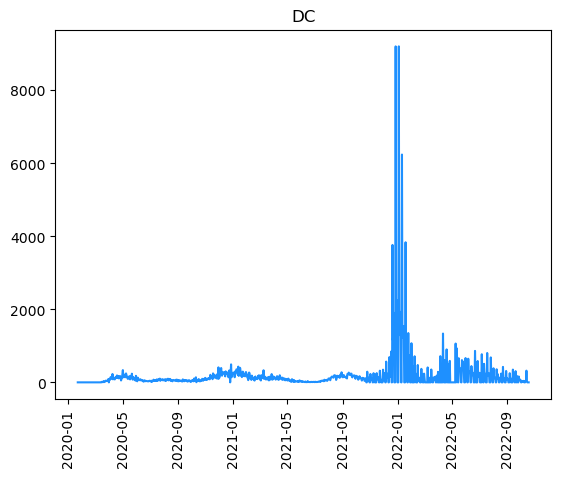

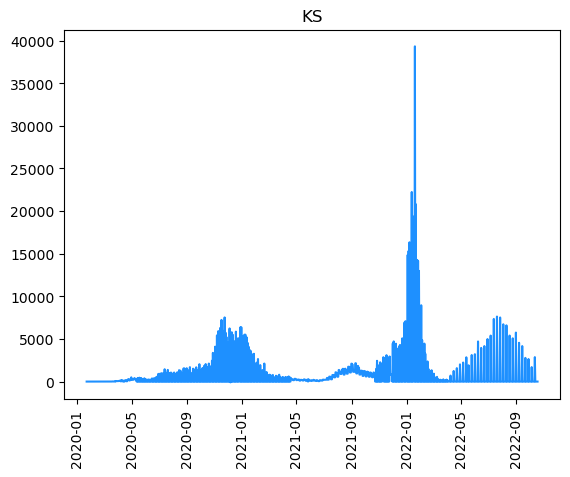

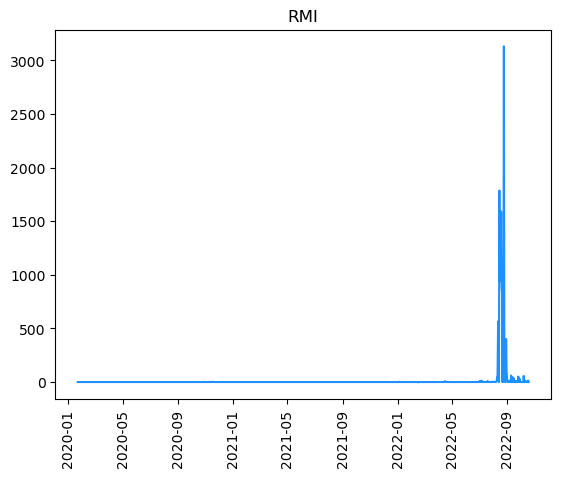

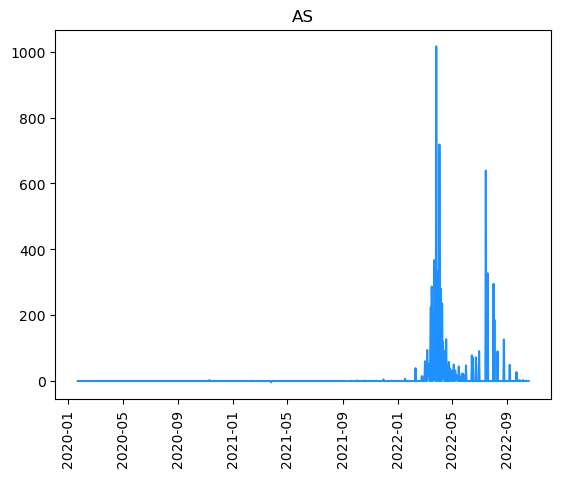

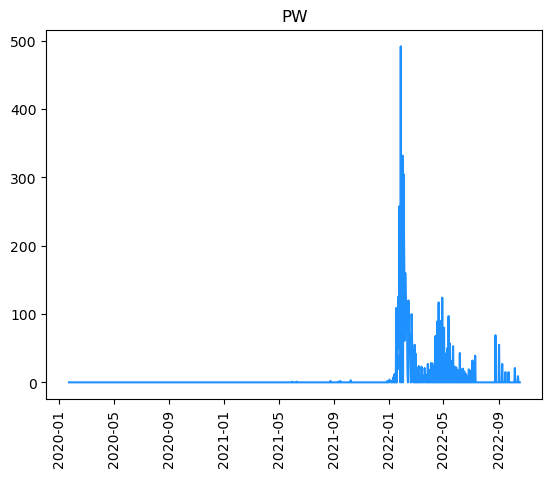

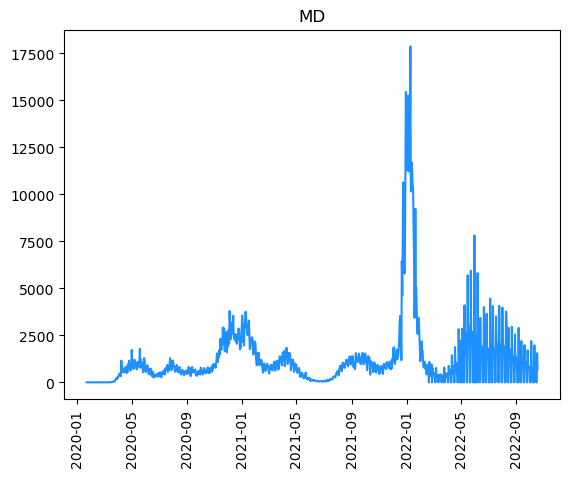

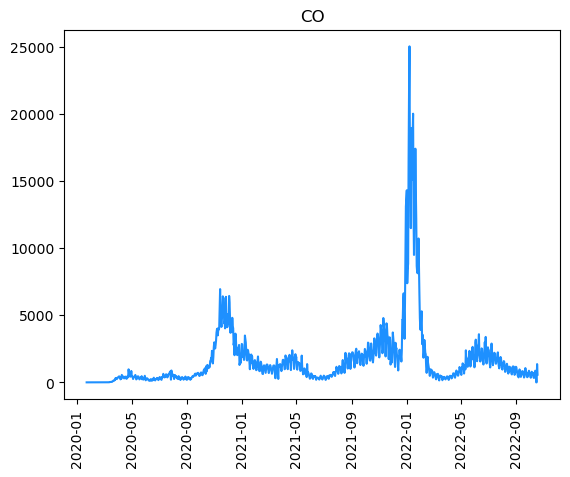

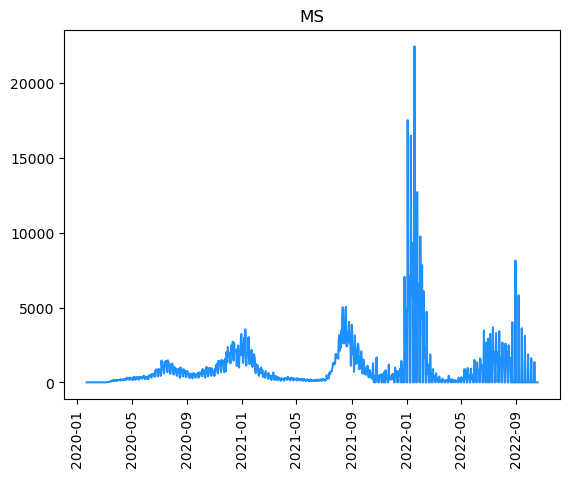

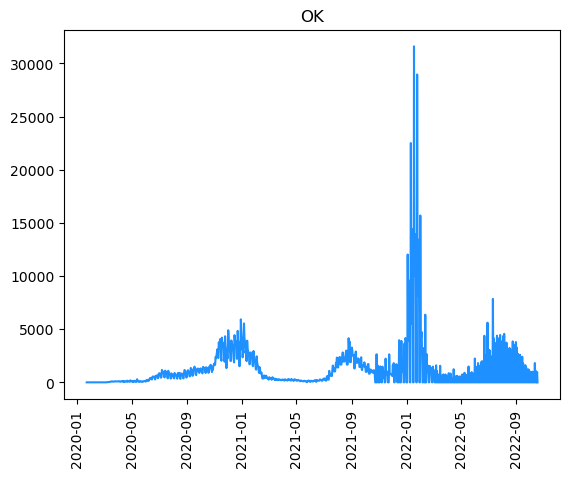

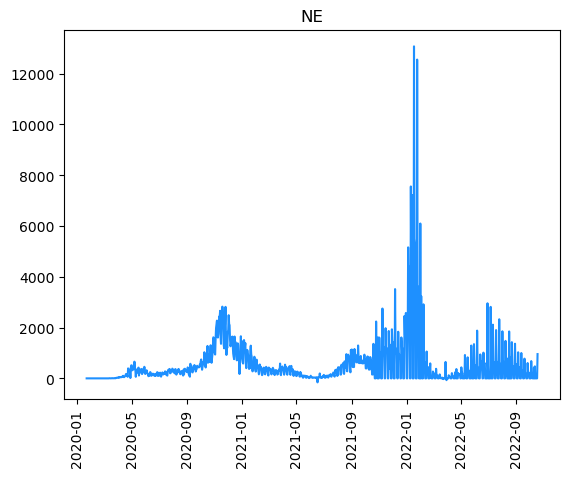

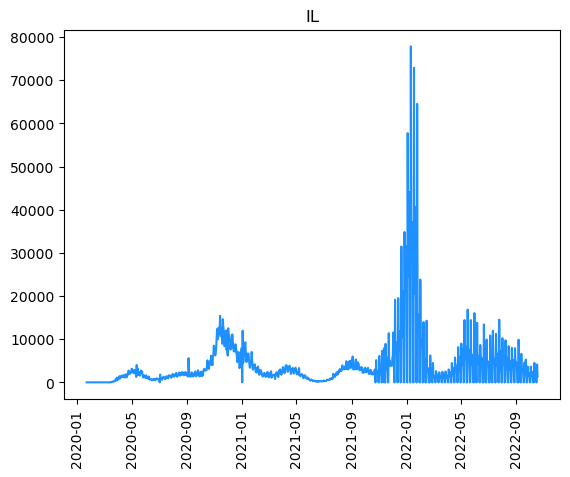

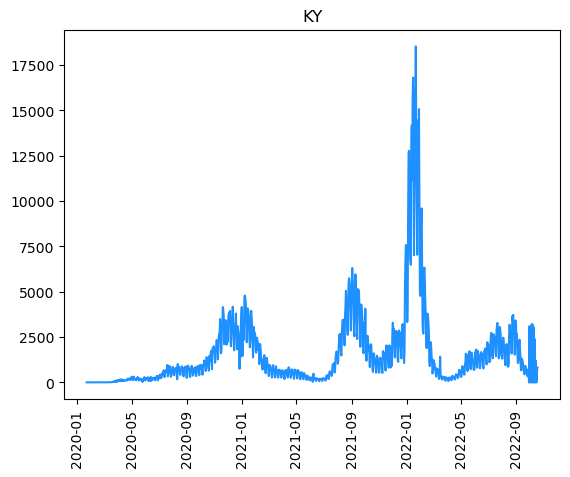

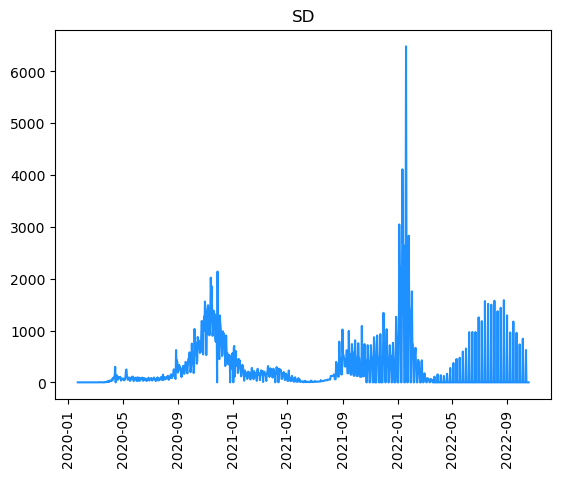

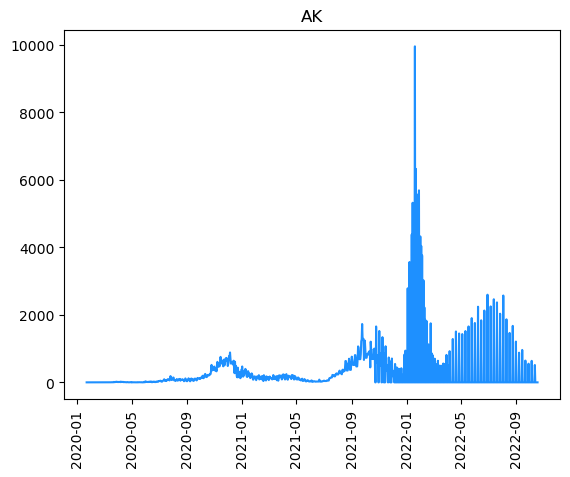

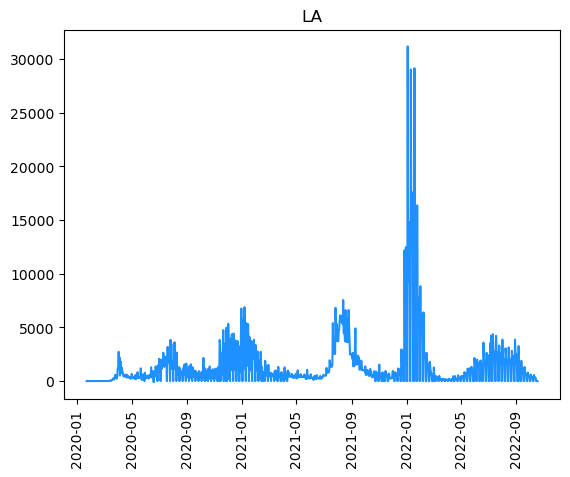

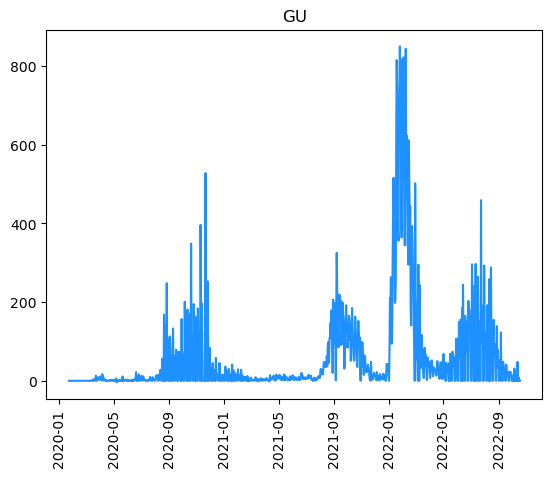

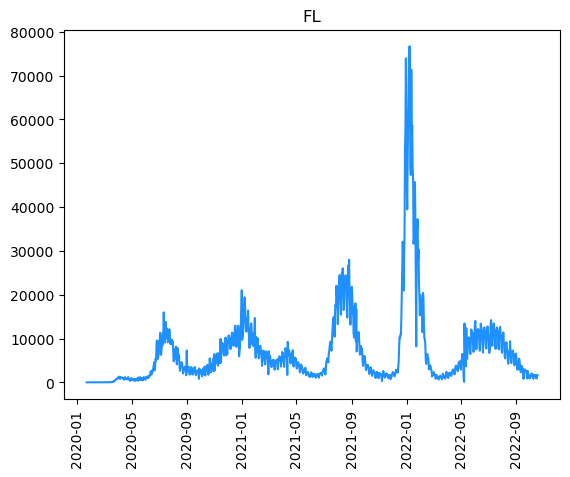

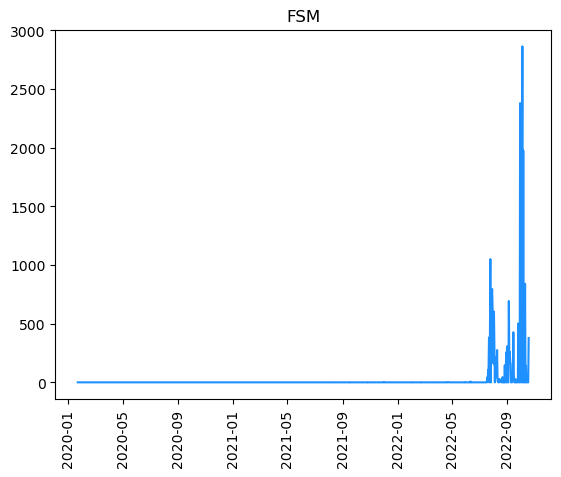

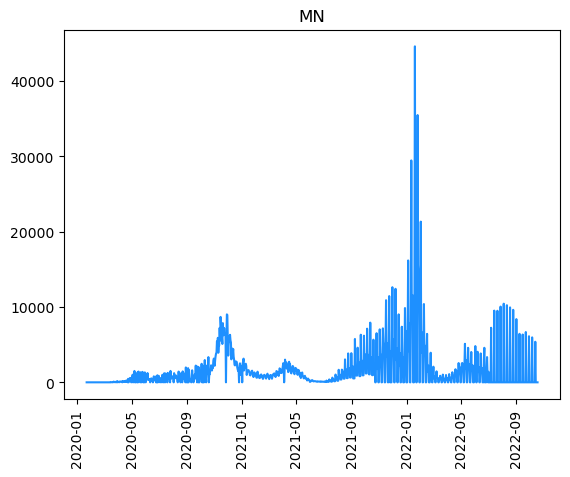

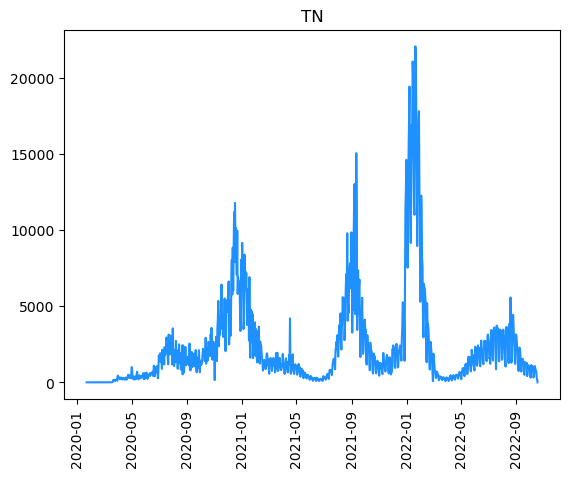

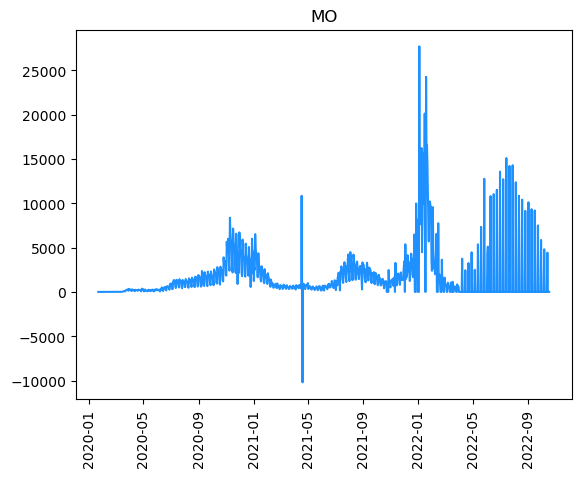

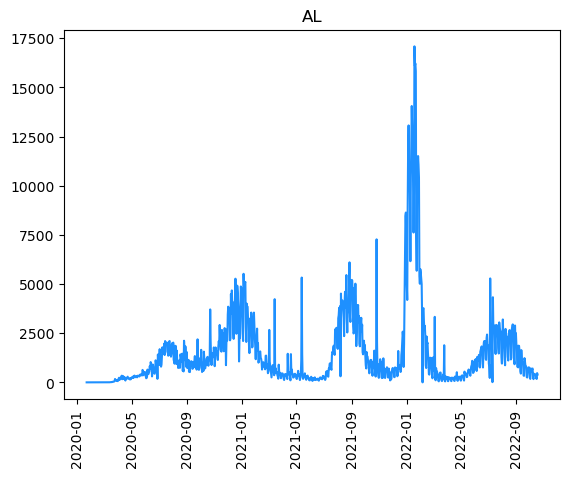

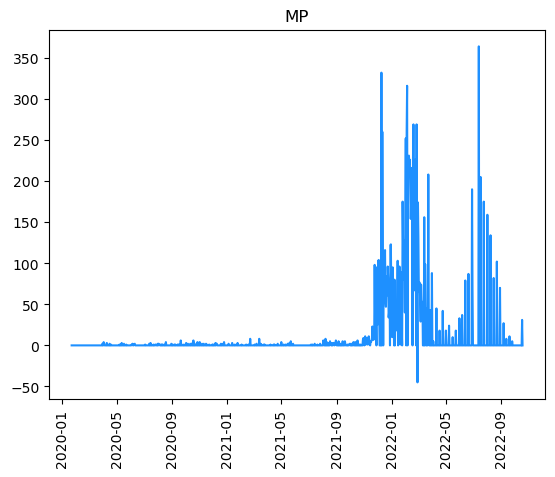

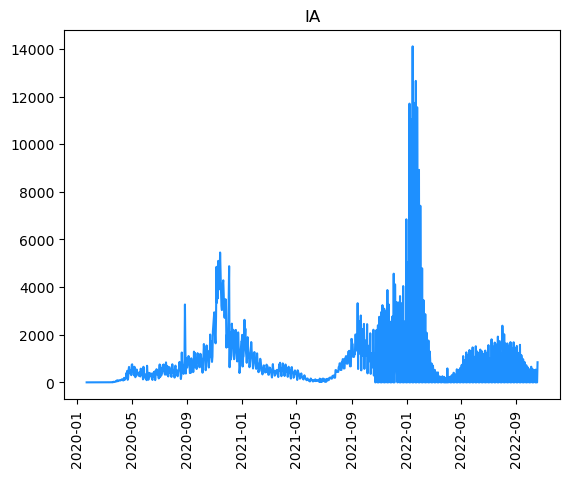

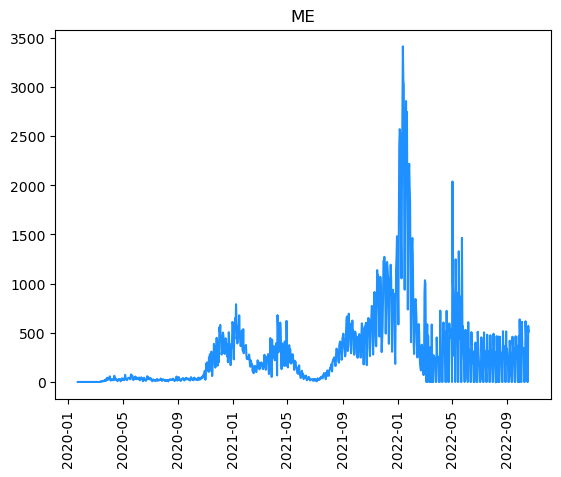

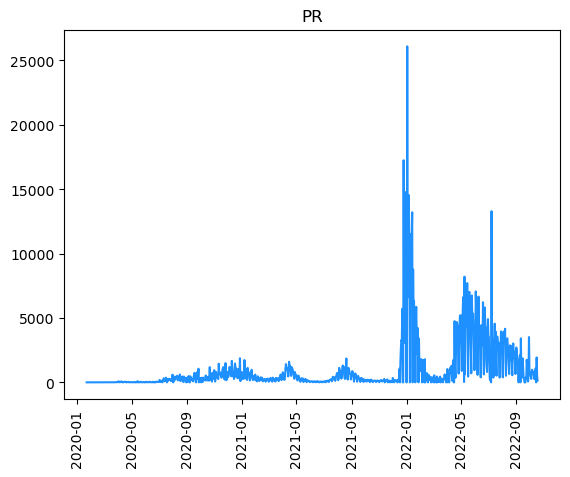

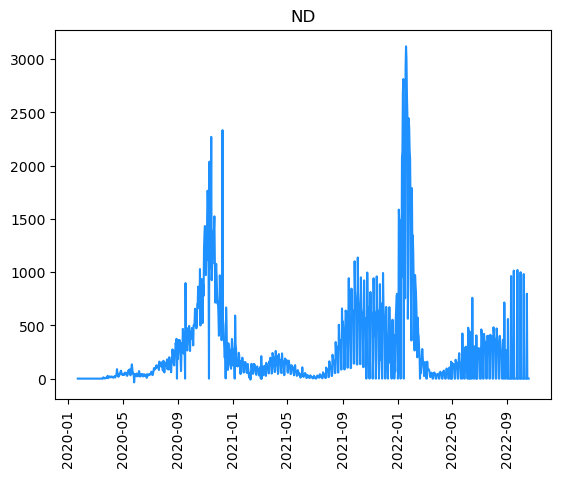

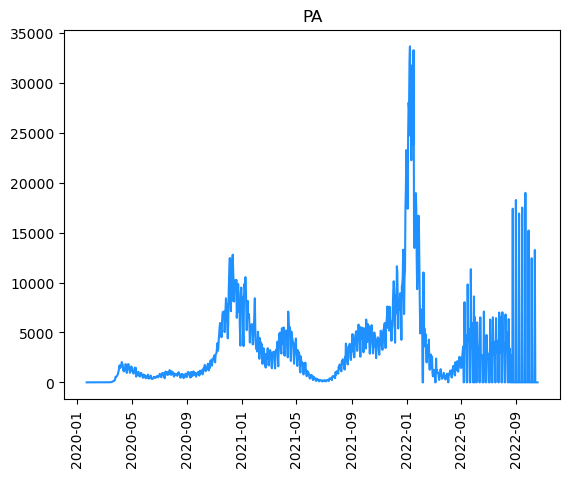

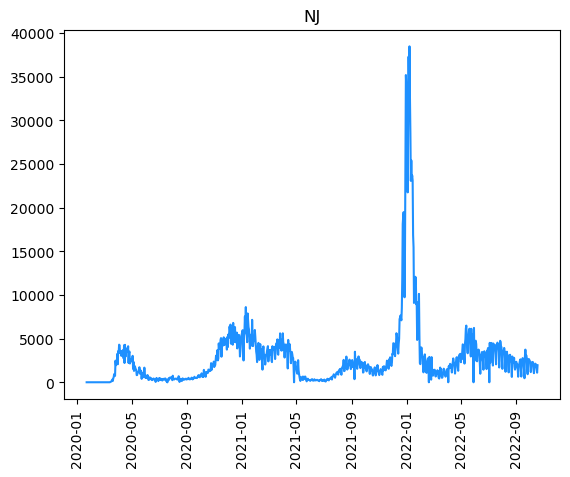

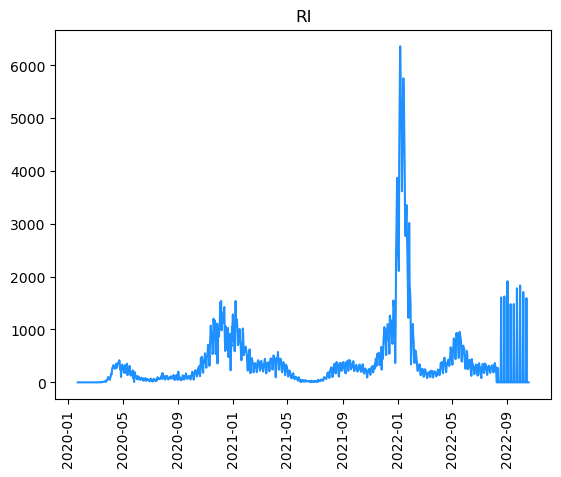

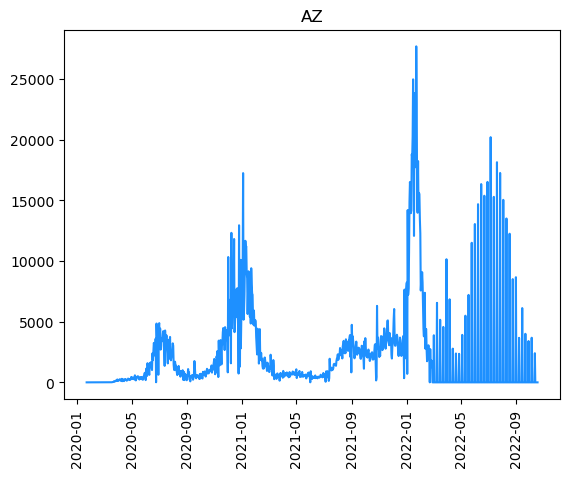

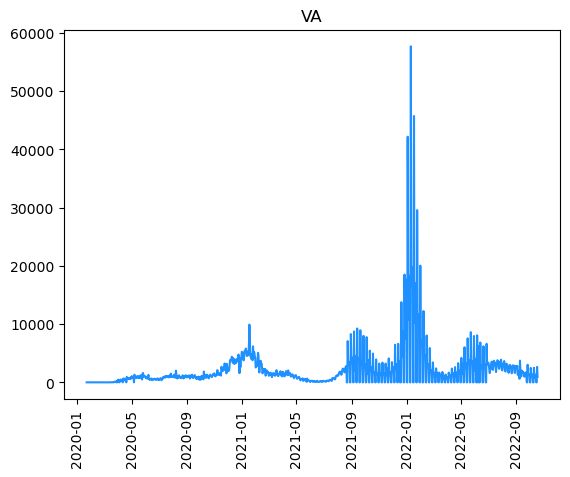

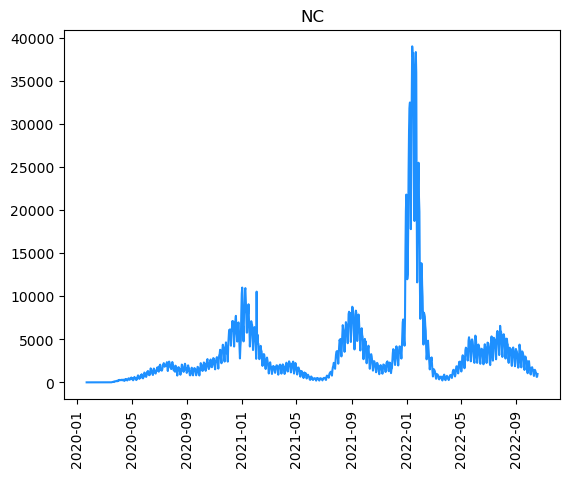

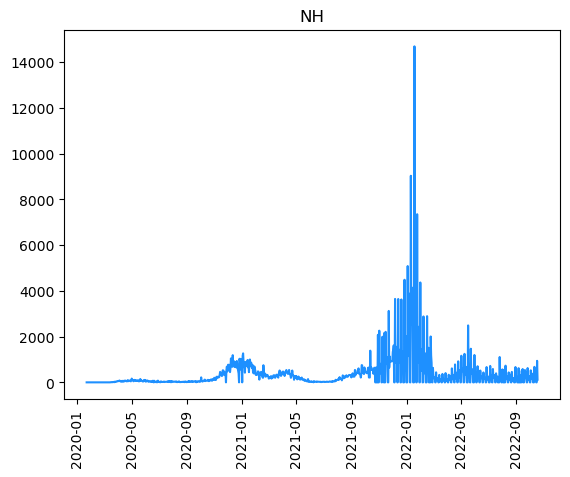

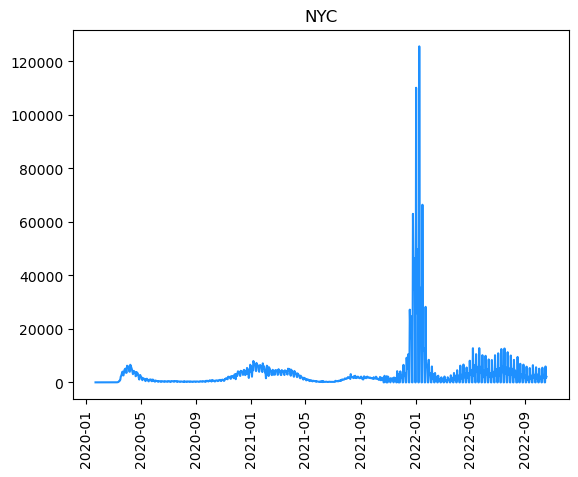

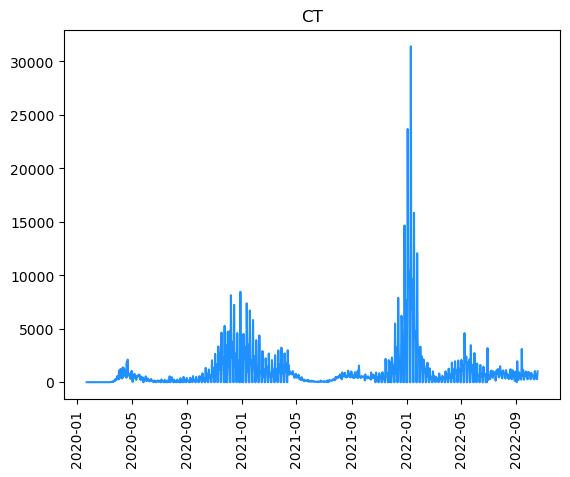

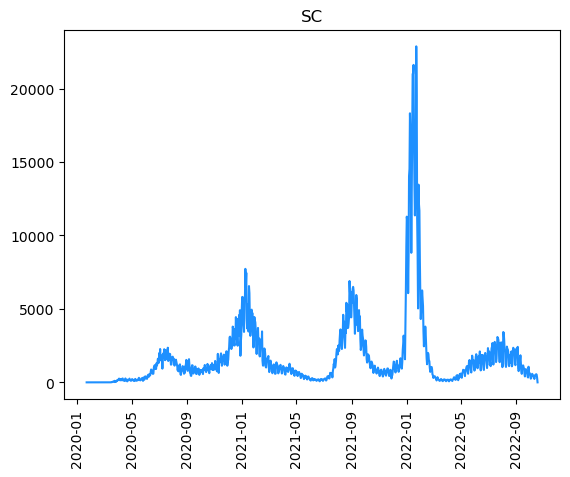

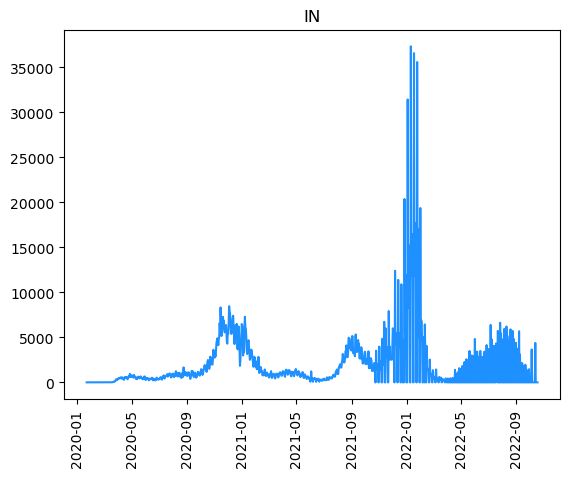

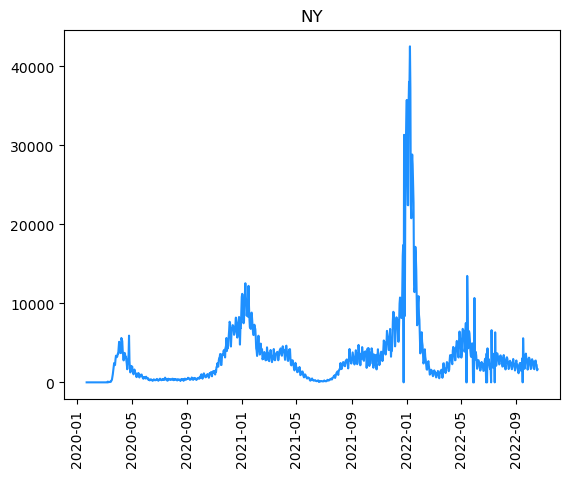

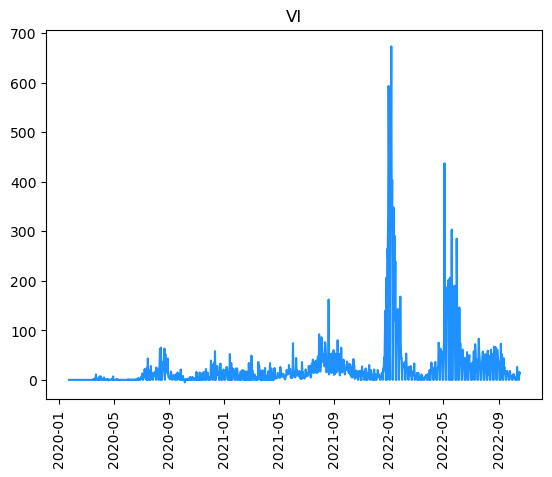

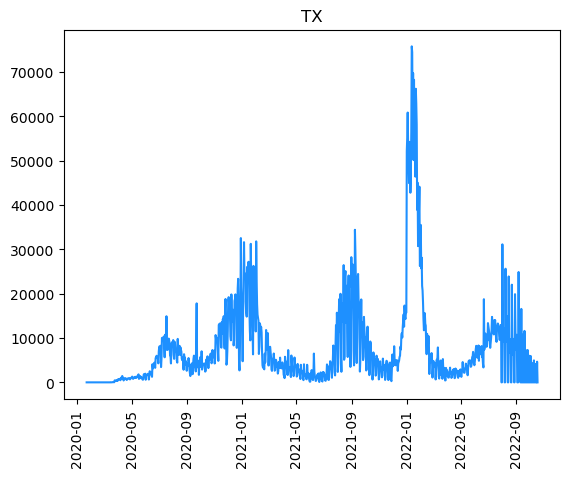

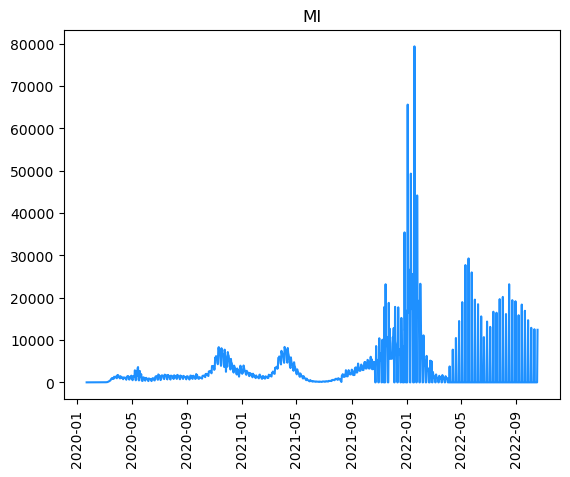

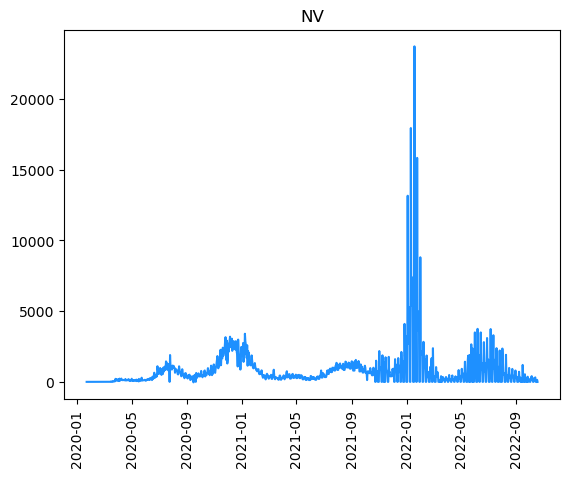

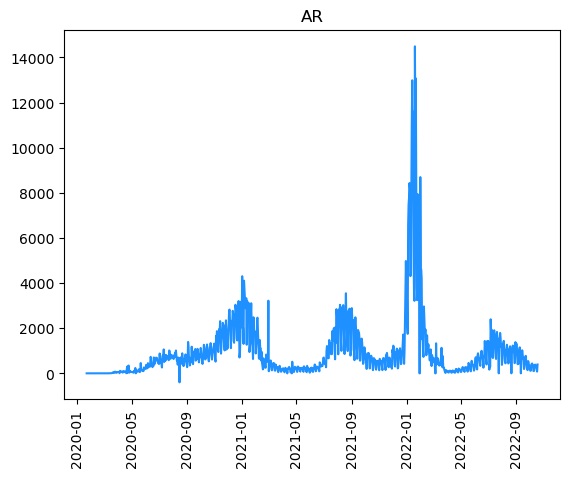

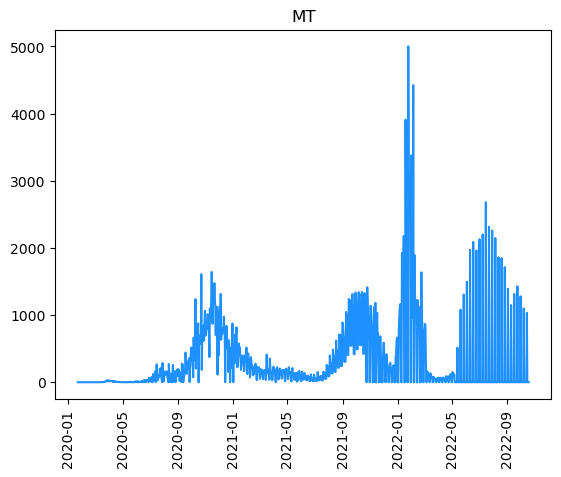

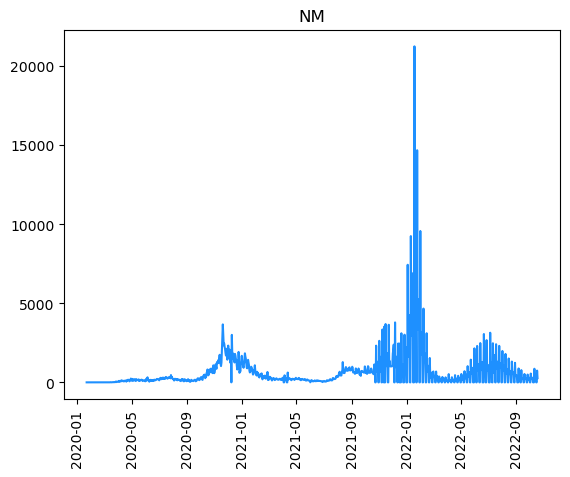

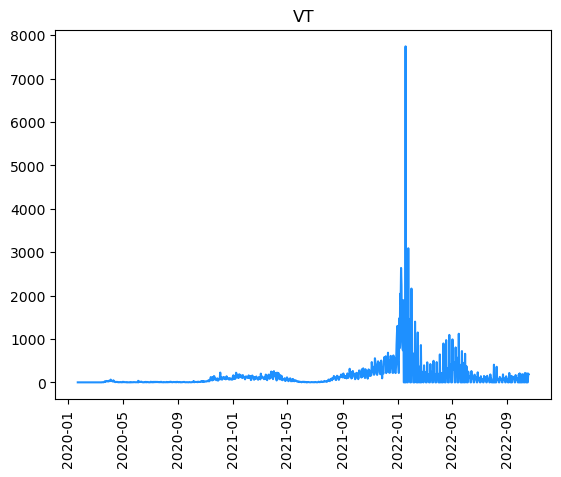

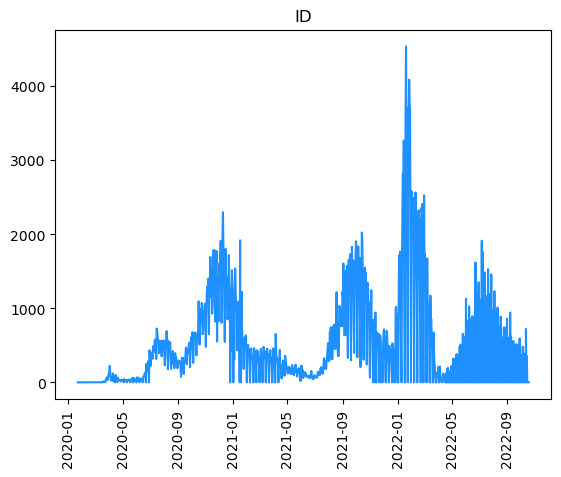

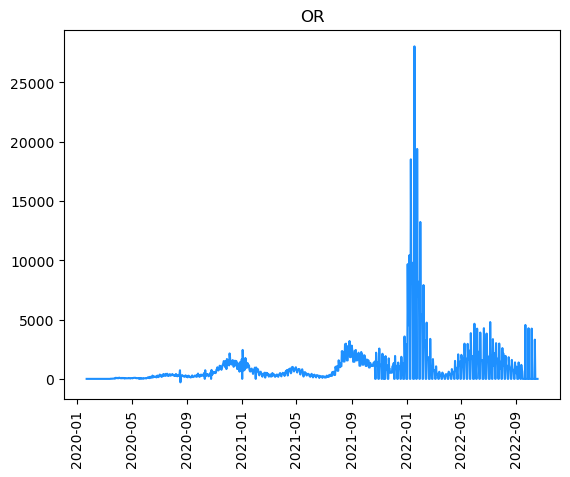

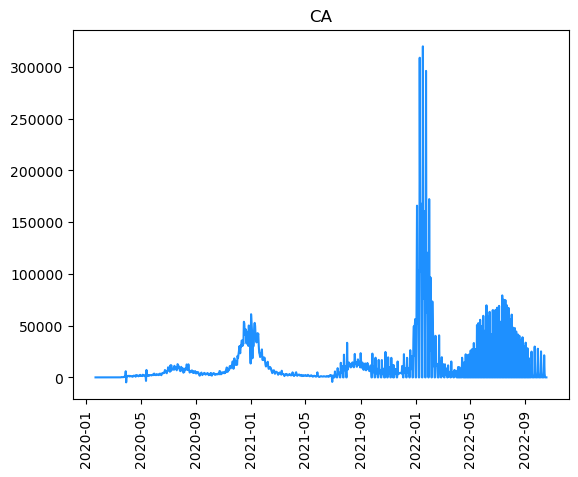

In [106]:

for state in data_df["state"].unique():
    data = data_df.loc[(data_df["state"] == state)]
    plt.plot(data.index.values, data['new_case'], color = "dodgerblue")
    plt.title(state)
    plt.xticks(rotation=90)
    plt.savefig(f"{state}.png")
    plt.show()
    

In [56]:
# Create a copy of DataFrame with columns we need
reduced_data_df = data_df[["state", "tot_cases", "new_case"]].copy()
reduced_data_df.head()

,state,tot_cases,new_case
submission_date,,,
2020-01-22,WA,0,0
2020-01-22,WI,0,0
2020-01-22,WV,0,0
2020-01-22,UT,0,0
2020-01-22,GA,0,0


In [57]:
# List of Regions 
West = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "CO", "AZ", "NM"]
Mid_West = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
North_East = ["ME", "NH", "VT", "MA", "CT", "RMI", "NY", "PA", "NJ"]
South = ["TX", "OK", "AR", "LA", "MS", "TN", "KY", "AL", "FL", "GA", "SC", "NC", "VA", "WV", "DC", "MD", "DE"]

reduced_data_df["Region"] = reduced_data_df["state"].apply(lambda x: "West" if x in West else
                                                          ("Mid_West" if x in Mid_West else
                                                          ("North_East" if x in North_East else
                                                          ("South" if x in South else np.nan))))
reduced_data_df

,state,tot_cases,new_case,Region
submission_date,,,,
2020-01-22,WA,0,0,West
2020-01-22,WI,0,0,Mid_West
2020-01-22,WV,0,0,South
2020-01-22,UT,0,0,West
2020-01-22,GA,0,0,South
...,...,...,...,...
2022-10-18,NE,540345,956,Mid_West
2022-10-18,MD,1261834,689,South
2022-10-18,MO,1660094,0,Mid_West


In [58]:
# Getting Month and Year 
reduced_data_df['Year'] = pd.to_datetime(reduced_data_df.index).year
reduced_data_df['Month'] = pd.to_datetime(reduced_data_df.index).month

reduced_data_df.head()

,state,tot_cases,new_case,Region,Year,Month
submission_date,,,,,,
2020-01-22,WA,0,0,West,2020,1
2020-01-22,WI,0,0,Mid_West,2020,1
2020-01-22,WV,0,0,South,2020,1
2020-01-22,UT,0,0,West,2020,1
2020-01-22,GA,0,0,South,2020,1


In [59]:
# Dividing each region into sepereate DataFrames
West_data = reduced_data_df.loc[(reduced_data_df["Region"] == "West")]
Mid_West_data = reduced_data_df.loc[(reduced_data_df["Region"] == "Mid_West")]
South_data = reduced_data_df.loc[(reduced_data_df["Region"] == "South")]
North_East_data = reduced_data_df.loc[(reduced_data_df["Region"] == "North_East")]

Mid_West_data.tail()

,state,tot_cases,new_case,Region,Year,Month
submission_date,,,,,,
2022-10-18,MI,2874009,12414,Mid_West,2022,10
2022-10-18,IL,3789532,1333,Mid_West,2022,10
2022-10-18,WI,1884206,1156,Mid_West,2022,10
2022-10-18,NE,540345,956,Mid_West,2022,10
2022-10-18,MO,1660094,0,Mid_West,2022,10


## Exploratory Data Analysis (EDA)

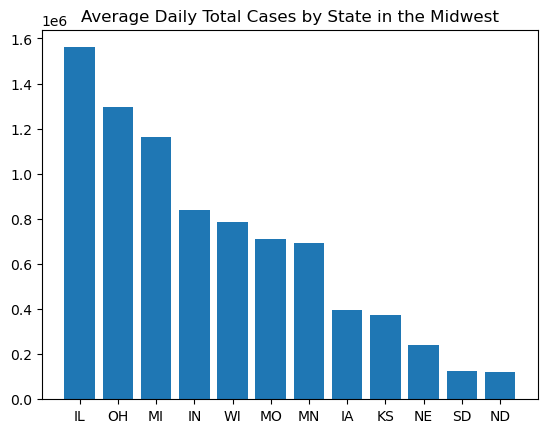

In [60]:
# Mid West Region
mean_cases_by_state = Mid_West_data.groupby("state").mean(numeric_only=True)[["tot_cases"]].reset_index().sort_values("tot_cases", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["tot_cases"])
plt.title("Average Daily Total Cases by State in the Midwest")
plt.savefig("bar_chart.png")
plt.show()

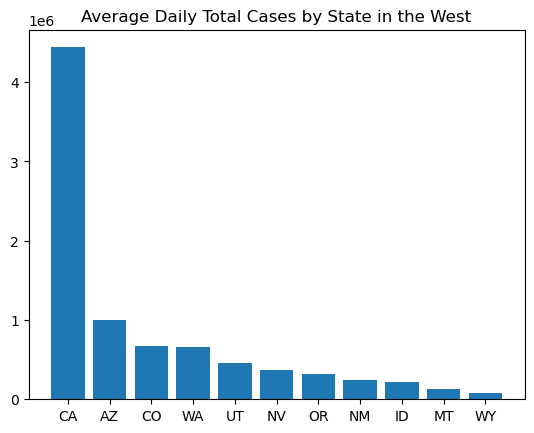

In [61]:
# West Region

mean_cases_by_state = West_data.groupby("state").mean(numeric_only=True)[["tot_cases"]].reset_index().sort_values("tot_cases", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["tot_cases"])
plt.title("Average Daily Total Cases by State in the West")
plt.savefig("bar_chart.png")
plt.show()

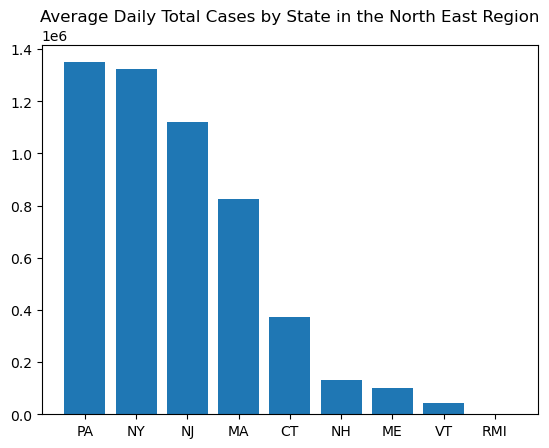

In [62]:
# North Region

mean_cases_by_state = North_East_data.groupby("state").mean(numeric_only=True)[["tot_cases"]].reset_index().sort_values("tot_cases", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["tot_cases"])
plt.title("Average Daily Total Cases by State in the North East Region")
plt.savefig("bar_chart.png")
plt.show()


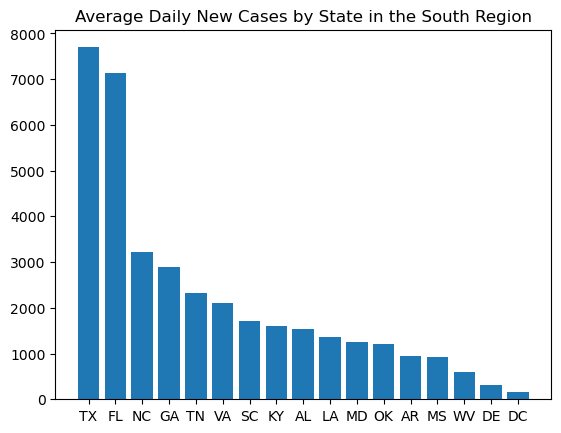

In [63]:
# South Region

mean_cases_by_state = South_data.groupby("state").mean(numeric_only=True)[["new_case"]].reset_index().sort_values("new_case", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["new_case"])
plt.title("Average Daily New Cases by State in the South Region")
plt.savefig("bar_chart.png")
plt.show()

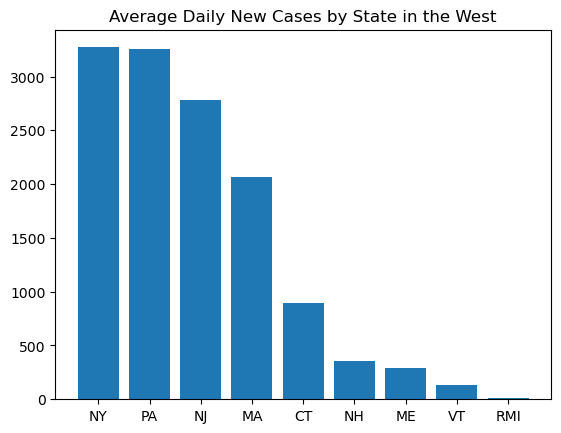

In [64]:
# North Region

mean_cases_by_state = North_East_data.groupby("state").mean(numeric_only=True)[["new_case"]].reset_index().sort_values("new_case", ascending=False)
plt.bar(mean_cases_by_state["state"], mean_cases_by_state["new_case"])
plt.title("Average Daily New Cases by State in the West")
plt.savefig("bar_chart.png")
plt.show()


In [65]:
mean_cases_by_state = reduced_data_df.groupby("state").mean()[["new_case"]].reset_index().sort_values("new_case", ascending=False)
mean_cases_by_state["region"] = mean_cases_by_state["state"].apply(lambda x: "West" if x in West else
                                                          ("Mid_West" if x in Mid_West else
                                                          ("North_East" if x in North_East else
                                                          ("South" if x in South else np.nan))))

mean_cases_by_state.head()

C:\Users\Ana Torres\AppData\Local\Temp\ipykernel_12464\2390527748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_cases_by_state = reduced_data_df.groupby("state").mean()[["new_case"]].reset_index().sort_values("new_case", ascending=False)


,state,new_case,region
5,CA,11120.866134,West
51,TX,7696.468531,South
10,FL,7138.694306,South
17,IL,3785.746254,Mid_West
38,NY,3271.859141,North_East


In [66]:
def get_corr_by_state(state):
    try:
        if state in list(data_df["state"]):
            corr = data_df[data_df["state"]==state].select_dtypes("number").corr()
            matrix = np.triu(corr)
            sns.heatmap(corr, annot=True, mask=matrix)
            plt.savefig("heatmap.png")
        else:
            print(f"State {state} not valid.")
    except:
        pass
    

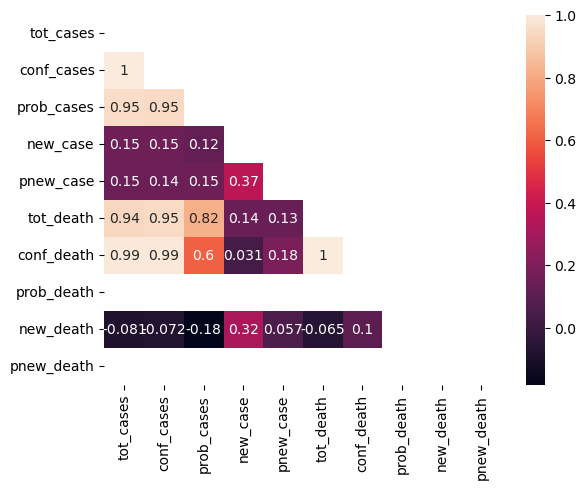

In [67]:
get_corr_by_state("CA")

In [68]:
def get_corr_by_region(region):
    
    data_df["region"] = data_df["state"].apply(lambda x: "West" if x in West else
                                                          ("Mid_West" if x in Mid_West else
                                                          ("North_East" if x in North_East else
                                                          ("South" if x in South else np.nan))))
    try:
        if region in list(data_df["region"]):
            corr = data_df[data_df["region"]==region].select_dtypes("number").corr()
            matrix = np.triu(corr)
            sns.heatmap(corr, annot=True, mask=matrix)
            plt.savefig("heatmap.png")
        else:
            print(f"Region {region} not valid. Please select a region from the following list: West, Mid_West, North_East, South. ")
    except:
        pass

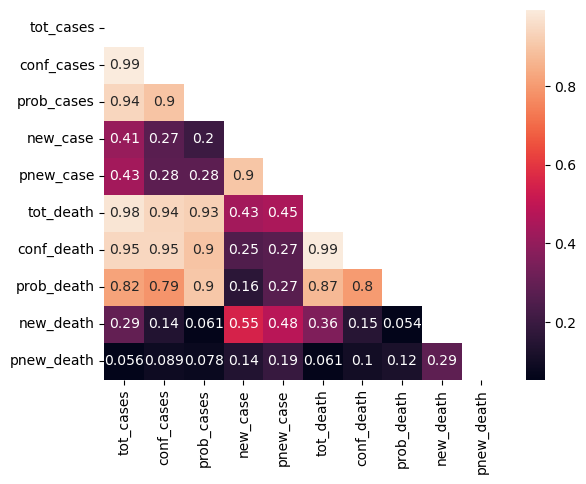

In [107]:
get_corr_by_region("South")